In [1]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### 1) Suno Research

In [2]:
with open('../crawlers/suno/data/results-full-suno-2020.json', encoding='utf8') as json_file:
    data = json.load(json_file)

df_suno = pd.DataFrame(data)

In [3]:
# Convert date to datetime format
df_suno['date'] = pd.to_datetime(df_suno['date'], format='%d/%m/%Y %H:%M')

# Set date column as index
df_suno.set_index('date', inplace=True)

# Order by date
df_suno.sort_index(inplace=True)

In [4]:
df_suno.sample(5)

,topic,title,full_text,url,tags
date,,,,,
2020-04-08 09:49:00,Negócios,Banco Inter (BIDI4) tem alta de 155% correntis...,O Banco Inter (BIDI4) divulgou nesta quarta-fe...,https://www.sunoresearch.com.br/noticias/banco...,"[Banco Inter, BIDI11, bidi4]"
2018-10-07 13:45:00,Política,Balanço do TSE aponta substituição de 310 urna...,"A ministra Rosa Weber, presidente do Tribunal ...",https://www.sunoresearch.com.br/noticias/tse-s...,[eleições]
2019-11-27 19:14:00,Negócios,Grupo Bitcoin Banco tem recuperação judicial a...,A Justiça do Paraná aceitou o pedido de recupe...,https://www.sunoresearch.com.br/noticias/grupo...,"[Grupo Bitcoin Banco, Rei do bitcoin]"
2019-03-28 18:08:00,Mercado,"Ibovespa tem alta de 2,7% após cair mais de 3%...",O Ibovespa fechou esta quinta-feira (28) em al...,https://www.sunoresearch.com.br/noticias/ibove...,"[Bolsa de Valores, Eletrobras, ibovespa, Jair ..."
2020-11-05 07:49:00,Negócios,"Destaques de Empresas: Banco do Brasil, Ultrap...",Nos destaques de empresas desta quinta-feira (...,https://www.sunoresearch.com.br/noticias/desta...,"[ALPA3, ALPA4, Alpargatas, Banco do Brasil, BB..."


In [5]:
df_suno.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19344 entries, 2018-08-28 11:12:00 to 2021-01-02 16:36:00
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   topic      19344 non-null  object
 1   title      19344 non-null  object
 2   full_text  19344 non-null  object
 3   url        19344 non-null  object
 4   tags       19344 non-null  object
dtypes: object(5)
memory usage: 906.8+ KB


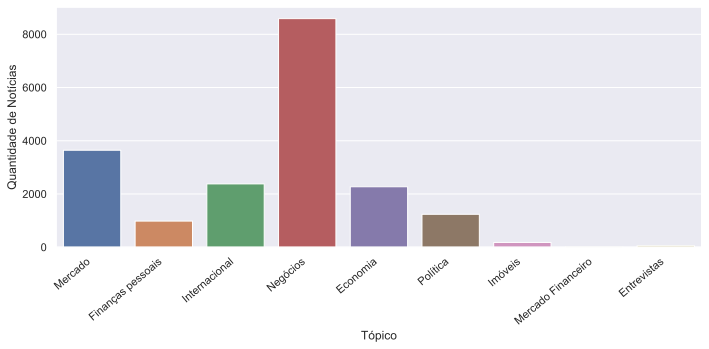

In [6]:
sns.set(style='darkgrid')

plt.figure(figsize=(10, 5))

ax = sns.countplot(df_suno['topic'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.ylabel('Quantidade de Notícias')
plt.xlabel('Tópico')

plt.tight_layout()
plt.show()

In [7]:
df_suno['topic'].value_counts()

Negócios              8588
Mercado               3643
Internacional         2378
Economia              2271
Política              1237
Finanças pessoais      981
Imóveis                178
Entrevistas             54
Mercado Financeiro      14
Name: topic, dtype: int64

In [8]:
print ('Suno Research')

# Number of news per year
for year in range (2015, 2021):
    
    start_date = '{}-01-01'.format(year)
    end_date = '{}-12-31'.format(year)
    
    print('Notícias em {}: {}'.format(year, df_suno.loc[start_date:end_date].shape[0]))

Suno Research
Notícias em 2015: 0
Notícias em 2016: 0
Notícias em 2017: 0
Notícias em 2018: 1453
Notícias em 2019: 7712
Notícias em 2020: 10173


In [9]:
print (sum([1453, 7712, 10173]))

19338


### 2) MoneyTimes

In [10]:
with open('../crawlers/money-times/data/results-full-moneytimes-2020.json', encoding='utf8') as json_file:
    data = json.load(json_file)

df_moneytimes = pd.DataFrame(data)

In [11]:
# Convert date to datetime format
df_moneytimes['date'] = pd.to_datetime(df_moneytimes['date'], format='%d/%m/%Y - %H:%M')

# Set date column as index
df_moneytimes.set_index('date', inplace=True)

# Order by date
df_moneytimes.sort_index(inplace=True)

In [12]:
df_moneytimes.sample(5)

,topic,title,full_text,link,tags
date,,,,,
2020-01-24 12:42:00,Fundos Imobiliários,Fundo do BTG aluga andar inteiro para UBS até ...,"O BTG Pactual, administrador do fundo imobiliá...",https://www.moneytimes.com.br/fundo-do-btg-alu...,"[BTG Pactual, Fundos Imobiliários, Imóveis, UBS]"
2019-09-20 17:31:00,Mercados,Eletrobras fecha em queda de 5% diante de resi...,Por Investing.com As ações da Eletrobras segui...,https://www.moneytimes.com.br/eletrobras-lider...,"[Ações, Eletrobras, Investing.com, Mercados, S..."
2018-02-02 16:01:00,Bolsa,Eletrobras lidera perdas do Ibovespa com cetic...,Investing.com – As ações da Eletrobras (SA:ELE...,https://www.moneytimes.com.br/eletrobras-lider...,"[Bolsa, Eletrobras, Ibovespa, Privatização, Se..."
2020-01-29 10:47:00,Internacional,As 5 principais notícias do mercado internacio...,"É o auge da temporada ganhos, devido as atuali...",https://www.moneytimes.com.br/as-5-principais-...,"[Apple, Donald Trump, EUA, Federal Reserve, In..."
2019-02-07 15:00:00,Política,Bolsonaro defende união para transformar Brasi...,"Ainda internado no Hospital Albert Einstein, e...",https://www.moneytimes.com.br/bolsonaro-defend...,"[Economia, Jair Bolsonaro, Política, Segurança]"


In [13]:
df_moneytimes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 98183 entries, 2000-04-08 11:36:00 to 2021-01-02 17:00:00
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   topic      98183 non-null  object
 1   title      98183 non-null  object
 2   full_text  98183 non-null  object
 3   link       98183 non-null  object
 4   tags       98183 non-null  object
dtypes: object(5)
memory usage: 4.5+ MB


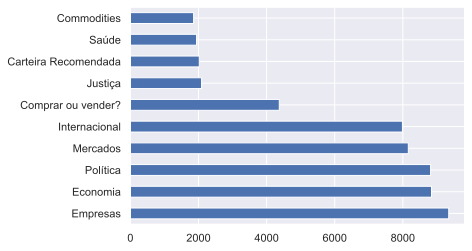

In [14]:
df_moneytimes['topic'].value_counts()[:10].plot(kind='barh')

In [15]:
print ('Money Times')

# Number of news per year
for year in range (2015, 2021):
    
    start_date = '{}-01-01'.format(year)
    end_date = '{}-12-31'.format(year)
    
    print('Notícias em {}: {}'.format(year, df_moneytimes.loc[start_date:end_date].shape[0]))

Money Times
Notícias em 2015: 1
Notícias em 2016: 227
Notícias em 2017: 8640
Notícias em 2018: 16769
Notícias em 2019: 31064
Notícias em 2020: 41401


In [16]:
print (sum([16769, 31064, 41401]))

89234


### 3) InfoMoney

In [17]:
with open('../crawlers/infomoney/data/results-full-infomoney-2020.json', encoding='utf8') as json_file:
    data = json.load(json_file)

df_infomoney = pd.DataFrame(data)

In [18]:
def convert_month(full_date):
    
    m_list = ['jan', 'fev', 'mar', 'abr', 'maio', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez']
    
    for m in m_list:
        if m in full_date:
            full_date = full_date.replace(m, str(m_list.index(m) + 1))
            
    return full_date

In [19]:
df_infomoney['date'] = df_infomoney['date'].apply(convert_month)

# Convert date to datetime format
df_infomoney['date'] = pd.to_datetime(df_infomoney['date'], format='%d %m %Y %Hh%M', infer_datetime_format=True)

# Set date column as index
df_infomoney.set_index('date', inplace=True)

# Order by date
df_infomoney.sort_index(inplace=True)

In [20]:
df_infomoney.sample(5)

,topic,title,full_text,link,tags
date,,,,,
2014-12-09 10:05:00,negocios,10 fundos brasileiros entram em ação por repar...,"(SÃO PAULO) – Até a noite desta segunda-feira,...",https://www.infomoney.com.br/negocios/10-fundo...,"[Negócios, Estatais, Governança Corporativa, P..."
2014-10-27 12:47:00,politica,“Não tenho dúvida de que Dilma vai dobrar a ap...,SÃO PAULO – Após a reeleição de Dilma Rousseff...,https://www.infomoney.com.br/politica/nao-tenh...,"[Política, Brasil, Dilma Rousseff, Empiricus]"
2014-06-26 16:23:00,negocios,Conselheiro pode questionar Petrobras na CVM s...,SÃO PAULO – Um membro do Conselho de Administr...,https://www.infomoney.com.br/negocios/conselhe...,"[Negócios, Conselho de Administração, CVM, Pet..."
2020-05-14 10:38:00,mercados,"Ações de Ultrapar, Movida e Enauta disparam, P...",SÃO PAULO – Em uma sessão de reviravoltas para...,https://www.infomoney.com.br/mercados/acoes-da...,"[Mercados, Ações, Azul, Enauta Part, GOL, Pão ..."
2016-03-22 12:00:00,mercados,Preço do etanol hidratado recua em São Paulo,SÃO PAULO – Na terceira semana de março (entre...,https://www.infomoney.com.br/mercados/preco-do...,"[Mercados, Estoques, Etanol, Preços, São Paulo]"


In [21]:
df_infomoney.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 94962 entries, 2014-06-09 06:13:00 to 2021-01-02 11:45:00
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   topic      94962 non-null  object
 1   title      94962 non-null  object
 2   full_text  94962 non-null  object
 3   link       94962 non-null  object
 4   tags       94962 non-null  object
dtypes: object(5)
memory usage: 4.3+ MB


In [22]:
print ('InfoMoney')

# Number of news per year
for year in range (2015, 2021):
    
    start_date = '{}-01-01'.format(year)
    end_date = '{}-12-31'.format(year)
    
    print('Notícias em {}: {}'.format(year, df_infomoney.loc[start_date:end_date].shape[0]))

InfoMoney
Notícias em 2015: 17093
Notícias em 2016: 17234
Notícias em 2017: 16595
Notícias em 2018: 13300
Notícias em 2019: 10072
Notícias em 2020: 11409


In [23]:
print (sum([13300, 10072, 11409]))

34781


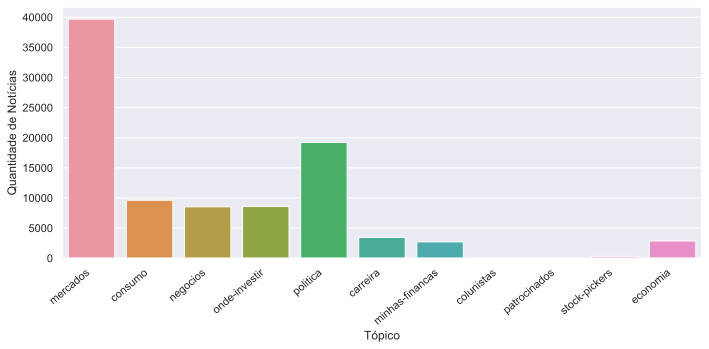

In [24]:
sns.set(style='darkgrid')

plt.figure(figsize=(10, 5))

ax = sns.countplot(df_infomoney['topic'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.ylabel('Quantidade de Notícias')
plt.xlabel('Tópico')

plt.tight_layout()
plt.show()

### 4) Fundamentus

In [25]:
with open('../crawlers/fundamentus/data/results-fundamentus.json', encoding='utf8') as json_file:
    data = json.load(json_file)

df_fundamentus = pd.DataFrame(data)

In [26]:
# Convert date to datetime format
df_fundamentus['date'] = pd.to_datetime(df_fundamentus['date'], format='%d/%m/%Y %H:%M')

# Set date column as index
df_fundamentus.set_index('date', inplace=True)

# Order by date
df_fundamentus.sort_index(inplace=True)

In [27]:
df_fundamentus.head(100)

,company,title,type,url,ticker
date,,,,,
2020-11-13 18:26:00,ENERGISA,Requerimento de registro de OPA - Rede Energia...,FR,https://www.rad.cvm.gov.br/ENET/frmDownloadDoc...,ENGI11
2020-11-13 18:29:00,PÃO DE AÇÚCAR,Digital Day GPA - participação do Diretor Pres...,CO,https://www.rad.cvm.gov.br/ENET/frmDownloadDoc...,PCAR3
2020-11-13 18:30:00,OSX BRASIL,Apresentação Pública de Resultados - 3º ITR 2020,CO,https://www.rad.cvm.gov.br/ENET/frmDownloadDoc...,OSXB3
2020-11-13 18:48:00,Tenda,Agenda de Eventos 16.11.2020 - 22.11.2020,CO,https://www.rad.cvm.gov.br/ENET/frmDownloadDoc...,TEND3
2020-11-13 18:55:00,CEA MODAS,Inauguração de Loja,CO,https://www.rad.cvm.gov.br/ENET/frmDownloadDoc...,CEAB3
...,...,...,...,...,...
2020-11-18 18:19:00,EMAE,Assinatura de contrato com o vencedor da licit...,CO,https://www.rad.cvm.gov.br/ENET/frmDownloadDoc...,EMAE4
2020-11-18 18:20:00,ETERNIT,Alienação da UPI Louças Sanitárias,FR,https://www.rad.cvm.gov.br/ENET/frmDownloadDoc...,ETER3
2020-11-18 18:31:00,TECNISA,Comunicado ao Mercado - Evento Online com Exec...,CO,https://www.rad.cvm.gov.br/ENET/frmDownloadDoc...,TCSA3


In [28]:
df_fundamentus.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1049 entries, 2020-11-13 18:26:00 to 2021-01-06 09:06:00
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   company  1049 non-null   object
 1   title    1049 non-null   object
 2   type     1049 non-null   object
 3   url      1049 non-null   object
 4   ticker   1049 non-null   object
dtypes: object(5)
memory usage: 49.2+ KB


---